In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange
import random
from scipy.spatial.distance import cdist
%matplotlib inline

In [35]:
from sklearn.datasets import make_blobs
# Create Data
data, labels = make_blobs(n_samples=200, n_features=2, 
                           centers=2, cluster_std=4.0, random_state=100)
x = data[:,0]
y = data[:,1]

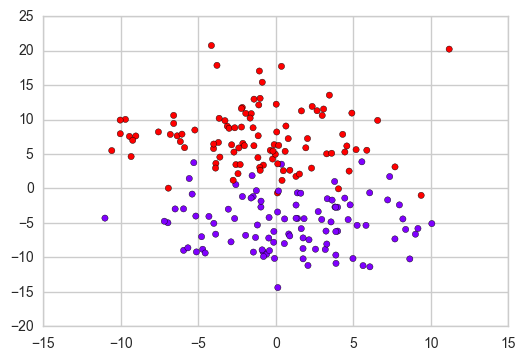

In [36]:
sns.set_style("whitegrid")
plt.scatter(x , y, c = labels, cmap='rainbow')

## Knn classification demo

In [37]:
import knn

In [38]:
k_opt, accuracy = knn.cross_val(data, labels, method="class", n_bags=20, kmax=30, seed = 1)

(<matplotlib.text.Text at 0x7f1a91ee28d0>,
 <matplotlib.text.Text at 0x7f1a91dff3c8>)

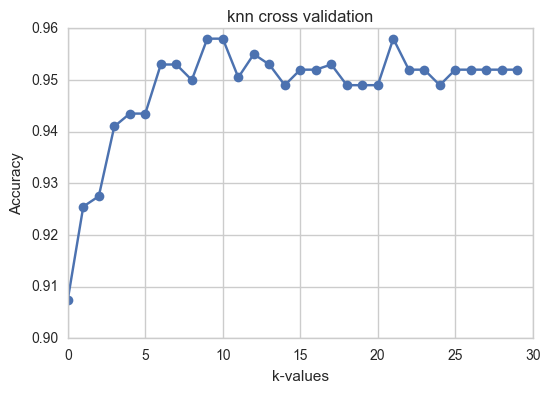

In [39]:
plt.plot(accuracy,'o-'); plt.ylabel("Accuracy"); plt.xlabel("k-values"), plt.title("knn cross validation")

In [40]:
pred_test=knn.testing(train = data, test=data, labels=labels, k_opt = k_opt)

In [41]:
knn.getAccuracy(pred_test,labels)

0.955

## Knn regression demo

In [42]:
n = 30
rand = np.random.rand(n)*2 - 1
x = np.array(list(range(n)))
y = 1.0 + 2.0*x + 4.5*rand
z = -2.0 + y + rand

(<matplotlib.text.Text at 0x7f1a9147ad30>,
 <matplotlib.text.Text at 0x7f1a91428908>)

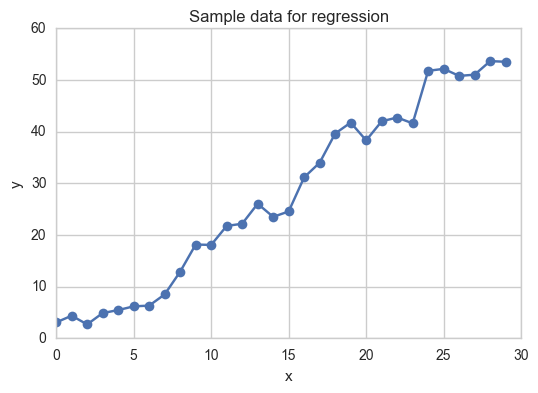

In [89]:
plt.plot(x,z,'o-');plt.ylabel("y"); plt.xlabel("x"), plt.title("Sample data for regression")

In [93]:
data = np.column_stack((x,y))
k_opt, accuracy = knn.cross_val(data = data, labels=z, method="reg", n_bags=10, kmax=24, seed = 10)

(<matplotlib.text.Text at 0x7f1a914a1ac8>,
 <matplotlib.text.Text at 0x7f1a912db1d0>)

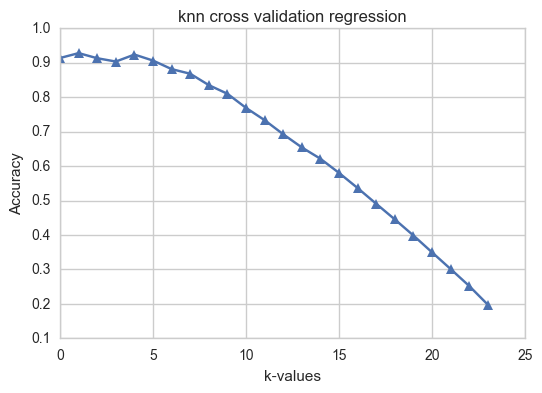

In [94]:
plt.plot(accuracy,'-^');plt.ylabel("Accuracy"); plt.xlabel("k-values"), plt.title("knn cross validation regression")

In [80]:
pred_test=knn.testing(train = data, test = data, labels=z, method="reg", k_opt = k_opt)

In [87]:
knn.getAccuracy(z, pred_test, method = "reg")

0.9301953491860588

(<matplotlib.legend.Legend at 0x7f1a90e524e0>,
 <matplotlib.text.Text at 0x7f1a90e2ffd0>)

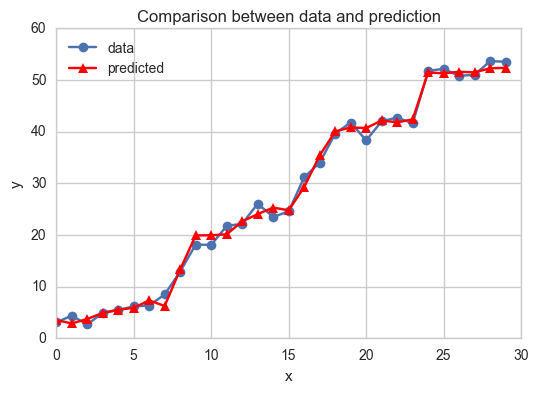

In [105]:
plt.plot(x,z,'o-', label = 'data'); plt.plot(x,pred_test,'-^', color = 'red', label='predicted')
plt.xlabel("x"); plt.ylabel("y"); plt.legend(loc='best'), plt.title("Comparison between data and prediction")